### KNN Implementation

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
# import dataset
dataset = pd.read_csv('/content/drive/MyDrive/AI/dataset.csv')

In [55]:
dataset

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [56]:
#Extracting Independent and dependent Variable  
x_test = dataset.iloc[:, [2,3]].values  
#y = dataset.iloc[:, 4].values  
  
# Splitting the dataset into training and test set.  
#from sklearn.model_selection import train_test_split  
#x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)

In [57]:
x_test

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000]])

In [32]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

In [44]:
x_train

array([[-0.33751184,  0.74965925],
       [-0.06428797,  2.82429766],
       [-0.51966109,  0.09763004],
       [ 0.2089359 , -1.02860223],
       [-0.61073571,  0.74965925],
       [ 1.30183138, -0.16910918],
       [ 1.21075676, -0.7915007 ],
       [-0.61073571, -0.34693533],
       [-0.51966109,  0.06799235],
       [ 1.11968213, -0.85077608],
       [-1.15718345,  0.9274854 ],
       [-1.24825807, -1.05823992],
       [ 1.30183138, -0.88041378],
       [-1.24825807,  0.63110849],
       [ 1.392906  , -0.76186301],
       [-1.33933269,  0.80893464],
       [ 1.11968213, -0.96932685]])

In [34]:
x_test

array([[ 0.2089359 ,  0.30509388],
       [-0.06428797, -1.08787762],
       [-0.70181033, -0.64331224],
       [-0.61073571, -0.08019611],
       [-0.51966109,  0.86821002]])

In [36]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [37]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 

In [38]:
y_pred

array([0, 0, 0, 0, 0])

In [39]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

In [40]:
cm

array([[5]])

In [41]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


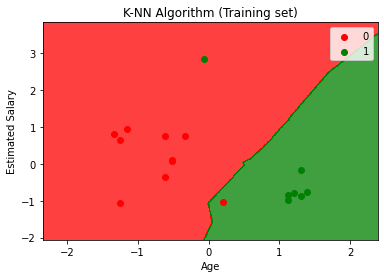

In [42]:
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
    c = ListedColormap(('r', 'g'))(i), label = j)  
plt.title('K-NN Algorithm (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


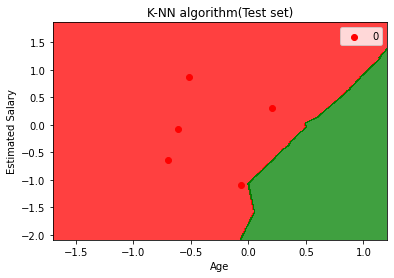

In [43]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('r', 'g'))(i), label = j)  
plt.title('K-NN algorithm(Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()   